In [1]:
import sys
import os
import matplotlib.pyplot as plt
import scipy.io
import numpy as np

In [2]:
perfect_matches

NameError: name 'perfect_matches' is not defined

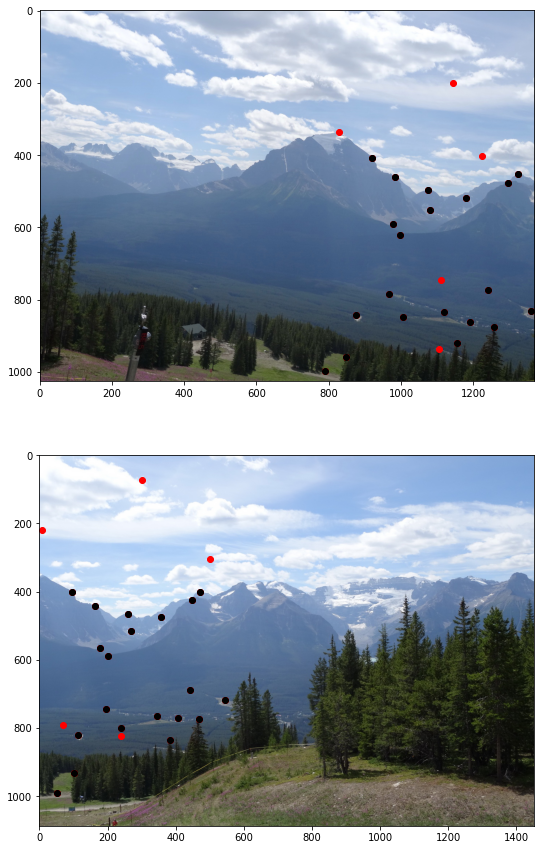

In [22]:
src_path = "./src.jpg"
dst_path = "./dst.jpg"

perfect_matches = scipy.io.loadmat('matches_perfect.mat')
perfect_matches['match_p_dst'] = perfect_matches['match_p_dst'].astype(np.int32)
perfect_matches['match_p_src'] = perfect_matches['match_p_src'].astype(np.int32)

matches =scipy.io.loadmat('matches.mat')
matches['match_p_dst'] = matches['match_p_dst'].astype(np.int32)
matches['match_p_src'] = matches['match_p_src'].astype(np.int32)

src_img = plt.imread(src_path)
dst_img = plt.imread(dst_path)

plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.imshow(src_img)
plt.scatter(x=matches['match_p_src'][0], y=matches['match_p_src'][1], c='red')
plt.scatter(x=perfect_matches['match_p_src'][0], y=perfect_matches['match_p_src'][1], c='black')

plt.subplot(2,1,2)
plt.imshow(dst_img)
plt.scatter(x=matches['match_p_dst'][0], y=matches['match_p_dst'][1], c='red')
plt.scatter(x=perfect_matches['match_p_dst'][0], y=perfect_matches['match_p_dst'][1], c='black')

In [20]:
from ex1_student_solution import Solution
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [23]:
H = Solution.compute_homography_naive(perfect_matches['match_p_src'], perfect_matches['match_p_dst'])

In [24]:
print(H)

[[-1.12313781e-03 -1.64757662e-04  9.99919585e-01]
 [-1.05117244e-05 -1.05462483e-03  1.25622164e-02]
 [-2.96940746e-07 -4.35706348e-08 -7.82907867e-04]]


In [25]:
frwrd_homo = Solution.compute_forward_homography_slow(H, src_img)

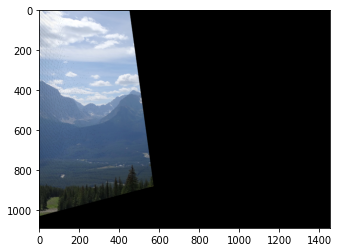

In [26]:
plt.imshow(frwrd_homo)

In [54]:
fast_frwrd_homo = Solution.compute_forward_homography_fast(H, src_img)

src shape:1026, 1368
yy:[[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1023 1023 1023 ... 1023 1023 1023]
 [1024 1024 1024 ... 1024 1024 1024]
 [1025 1025 1025 ... 1025 1025 1025]] 

xx:[[   0    1    2 ... 1365 1366 1367]
 [   0    1    2 ... 1365 1366 1367]
 [   0    1    2 ... 1365 1366 1367]
 ...
 [   0    1    2 ... 1365 1366 1367]
 [   0    1    2 ... 1365 1366 1367]
 [   0    1    2 ... 1365 1366 1367]]
XD b4 norm:[[ 9.99919585e-01  9.98796447e-01  9.97673310e-01 ... -7.02040135e-01
  -7.03163272e-01 -7.04286410e-01]
 [ 1.25622164e-02  1.25517047e-02  1.25411930e-02 ... -1.08277674e+00
  -1.08278725e+00 -1.08279776e+00]
 [-7.82907867e-04 -7.83204808e-04 -7.83501748e-04 ... -1.23289189e-03
  -1.23318883e-03 -1.23348577e-03]]    
X_D:[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] X_D0:[0 0 0 ... 0 0 0]
dst img before:[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0

In [56]:
fast_frwrd_homo

array([[[46, 47,  7],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

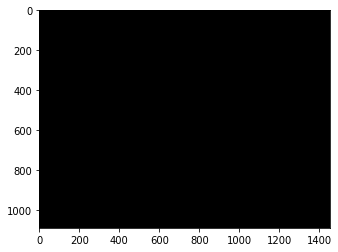

In [55]:
plt.imshow(fast_frwrd_homo)